<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning/blob/main/08_clustering/2_clustering_theorie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

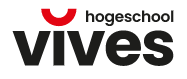<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



# CLUSTERING: THEORIE

## 1. Inleiding

### Wat is clustering?

- Clustering is een onderdeel van **unsupervised learning**
- Maakt gebruik van **niet-gelabelde data**!
- Soms toegepast om datasets te labelen

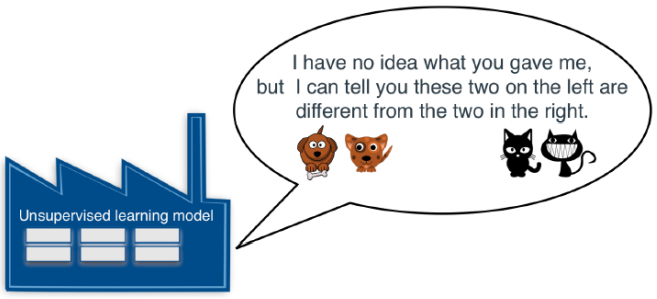

- **Groeperen** van datapunten o.b.v. gelijkenissen
- **Vergelijkingscriterium** (Engels: similarity measure) nodig!
- Vaak neemt men de **afstand** tussen datapunten: hoe dichter van elkaar, hoe meer gelijkend op elkaar
- Verschillende manieren om afstanden te meten, in 1, 2, 3, ..., N dimensies!


**Pas op! Niet verwarren met classificatie!**

- *classificatie*
  - = supervised learning
  - dataset is gelabeld
  - dus groepen (= klassen) zijn gekend bij de training!
- *clustering*
  - = unsupervised learning
  - dataset is *niet* gelabeld
  - dus groepen (= clusters) zijn *niet* gekend bij de training!

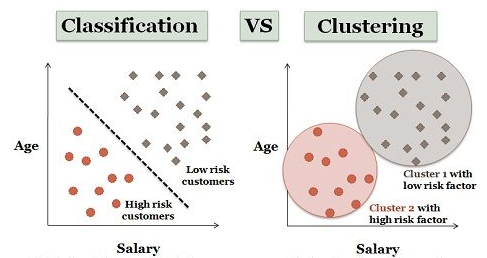

### Voorbeeldje

- Lees "mails.csv" in als dataframe,
- sorteer de rijen o.b.v. features "Size" en "Recipients",
- en maak een scatterplot waarbij je die twee features uitzet t.o.v. elkaar.

In hoeveel groepen zou je de mails opdelen?

In [ ]:
import pandas as pd
mails = pd.read_csv("mails.csv", sep=";")
mails.sort_values(by=["Size", "Recipients"])

,E-mail,Size,Recipients
0,1,8,1
3,4,10,2
1,2,12,1
6,7,23,6
5,6,25,5
8,9,26,7
7,8,28,6
4,5,40,2
2,3,43,1


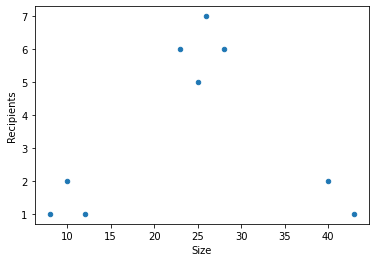

In [ ]:
mails.plot.scatter(x="Size", y="Recipients");

## 2. Afstanden meten

Verschillende afstandsmaten mogelijk:
- Euclidische afstand
- Manhattan afstand
- Gestandaardiseerde Euclidische afstand
- Cosinusgelijkheid
- ...

We bespreken eerst de Euclidische afstand, daarna de Manhattan afstand. Andere afstandsmaten vallen buiten de scope van dit hoofdstuk.

### 2.1. Euclidische afstand

#### 1-dimensionale gegevens

Wiskundig:
- 1 feature $x_1$
- afstand $d_{i,j}$ tussen 2 datapunten $i$ en $j$ = verschil tussen de waarden van feature $x_1$:
  - $d_{i,j} = |x_{1,i} - x_{1,j}|$
  - $d_{i,j} = \sqrt{(x_{1,i} - x_{1,j})^2}$
- Beiden geven zelfde resultaat, maar tweede is interessanter

Code:
- 1 feature `x1` = 1 vector = 1 kolom
- afstand `d` tussen 2 datapunten (= rijen) `i` en `j`:
  - `d = abs(x1[i] - x1[j])`
  - `d = sqrt((x1[i] - x1[j])**2)`
- Alle datapunten: matrix `D` met `D[i, j] = d`

##### Voorbeeld

Neem uit de dataset "mails.csv" het attribuut "Recipients" en bereken de afstand tussen de datapunten met id (attribuut "E-mail") 4 en 9. Filter de twee rijen uit de dataframe door gebruik te maken van boolean indexing.

In [ ]:
import numpy as np

d = np.sqrt((mails.loc[mails["E-mail"] == 4, "Recipients"].values -
             mails.loc[mails["E-mail"] == 9, "Recipients"].values) ** 2).item()
d

5.0

De afstand berekenen tussen alle mails:

In [ ]:
# Tip: maak gebruik van 2 for-lussen

n = len(mails)
D = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        # opgelet! de mail ids starten bij 1 ipv 0!
        D[i, j] = np.sqrt((mails.loc[mails["E-mail"] == i+1, "Recipients"].values -
                           mails.loc[mails["E-mail"] == j+1, "Recipients"].values) ** 2).item()
D

array([[0., 0., 0., 1., 1., 4., 5., 5., 6.],
       [0., 0., 0., 1., 1., 4., 5., 5., 6.],
       [0., 0., 0., 1., 1., 4., 5., 5., 6.],
       [1., 1., 1., 0., 0., 3., 4., 4., 5.],
       [1., 1., 1., 0., 0., 3., 4., 4., 5.],
       [4., 4., 4., 3., 3., 0., 1., 1., 2.],
       [5., 5., 5., 4., 4., 1., 0., 0., 1.],
       [5., 5., 5., 4., 4., 1., 0., 0., 1.],
       [6., 6., 6., 5., 5., 2., 1., 1., 0.]])

Resultaat:
- getallen op de diagonaal zijn nul: afstand tussen datapunt i en zichzelf
- matrix is symmetrisch: afstand tussen i en j = afstand tussen j en i
- matrix is symmetrisch: matrix = getransponeerde matrix: https://nl.wikipedia.org/wiki/Getransponeerde_matrix

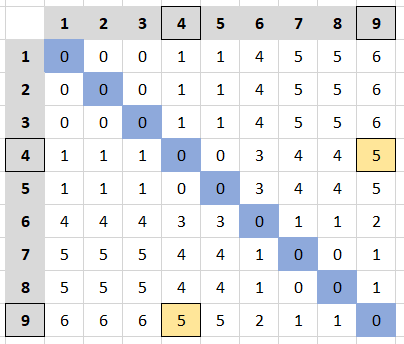

Berekening van afstanden kan dus efficiënter:

In [ ]:
n = len(mails)
D = np.zeros((n, n))  # elementen op diagonaal zijn reeds 0 -> overslaan
for i in range(n):
    for j in range(i+1, n):  # gebruik maken van symmetrie!
        D[i, j] = np.sqrt((mails.loc[mails["E-mail"] == i+1, "Recipients"].values -
                           mails.loc[mails["E-mail"] == j+1, "Recipients"].values) ** 2).item()
        D[j, i] = D[i, j]  # gebruik maken van symmetrie!
D

array([[0., 0., 0., 1., 1., 4., 5., 5., 6.],
       [0., 0., 0., 1., 1., 4., 5., 5., 6.],
       [0., 0., 0., 1., 1., 4., 5., 5., 6.],
       [1., 1., 1., 0., 0., 3., 4., 4., 5.],
       [1., 1., 1., 0., 0., 3., 4., 4., 5.],
       [4., 4., 4., 3., 3., 0., 1., 1., 2.],
       [5., 5., 5., 4., 4., 1., 0., 0., 1.],
       [5., 5., 5., 4., 4., 1., 0., 0., 1.],
       [6., 6., 6., 5., 5., 2., 1., 1., 0.]])

Symmetrie checken:

In [ ]:
np.all(D == D.T)  # D.T is de getransponeerde matrix

True

#### 2-dimensionale gegevens

Wiskundig:
- 2 features $x_1$ en $x_2$
- afstand $d_{i,j}$ tussen 2 datapunten $i$ en $j$
  - = **Euclidische afstand**:
  - $d_{i,j} = \sqrt{(x_{1,i} - x_{1,j})^2 + (x_{2,i} - x_{2,j})^2}$
  - toepassing van **stelling van Pythagoras**: https://nl.wikipedia.org/wiki/Stelling_van_Pythagoras

Code:
- 2 features `x1` en `x2` = 2 vectoren = 2 kolommen
- afstand `d` tussen 2 datapunten (= rijen) `i` en `j`:
  - `d = sqrt((x1[i] - x1[j])**2 + (x2[i] - x2[j])**2)`
- Alle datapunten: matrix `D` met `D[i, j] = d`

De figuur demonstreert het berekenen van de Euclidische afstand adhv de stelling van Pythagoras:
- Afstand tussen mails 1 en 4 = afstand tussen punten (8, 1) en (10, 1)
- 1D afstand volgens x-as = 10 - 8 = 2
- 1D afstand volgens y-as = 2 - 1 = 1
- Pythagoras: schuine zijde = `sqrt(2**2 + 1**2)` = 2.24
- 2D Euclidische afstand = schuine zijde = 2.24

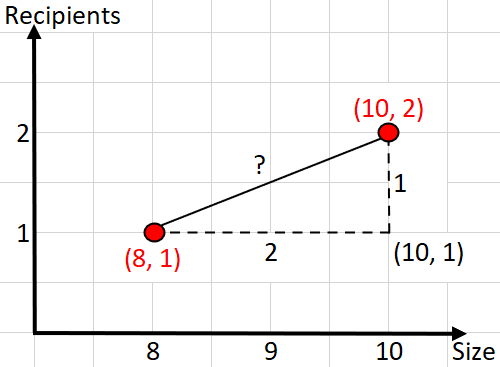

##### Voorbeeld

Berekenen van de Euclidische afstandsmatrix voor dataset "mails.csv":

In [ ]:
afstand = lambda punt1, punt2: np.sqrt((punt1[0]-punt2[0])**2 + (punt1[1]-punt2[1])**2)

n = len(mails)
D = np.zeros((n, n))  # elementen op diagonaal zijn reeds 0 -> overslaan
for i in range(n):
    for j in range(i+1, n):  # gebruik maken van symmetrie!
        punt1 = mails.loc[mails["E-mail"] == i+1, ["Size", "Recipients"]].values.flatten()
        punt2 = mails.loc[mails["E-mail"] == j+1, ["Size", "Recipients"]].values.flatten()
        D[i, j] = D[j, i] = afstand(punt1, punt2)  # gebruik maken van symmetrie!
D

array([[ 0.        ,  4.        , 35.        ,  2.23606798, 32.01562119,
        17.4642492 , 15.8113883 , 20.61552813, 18.97366596],
       [ 4.        ,  0.        , 31.        ,  2.23606798, 28.01785145,
        13.60147051, 12.08304597, 16.76305461, 15.23154621],
       [35.        , 31.        ,  0.        , 33.01514804,  3.16227766,
        18.43908891, 20.61552813, 15.8113883 , 18.02775638],
       [ 2.23606798,  2.23606798, 33.01514804,  0.        , 30.        ,
        15.29705854, 13.60147051, 18.43908891, 16.76305461],
       [32.01562119, 28.01785145,  3.16227766, 30.        ,  0.        ,
        15.29705854, 17.4642492 , 12.64911064, 14.86606875],
       [17.4642492 , 13.60147051, 18.43908891, 15.29705854, 15.29705854,
         0.        ,  2.23606798,  3.16227766,  2.23606798],
       [15.8113883 , 12.08304597, 20.61552813, 13.60147051, 17.4642492 ,
         2.23606798,  0.        ,  5.        ,  3.16227766],
       [20.61552813, 16.76305461, 15.8113883 , 18.43908891, 12

Symmetrie testen:

In [ ]:
np.all(np.round(D, 5) == np.round(D.T, 5))  # met round werken, want floats!

True

#### 3-dimensionale gegevens

Wiskundig:
- 3 features $x_1$, $x_2$ en $x_3$
- afstand $d_{i,j}$ tussen 2 datapunten $i$ en $j$
  - = **Euclidische afstand** in 3 dimensies:
  - $d_{i,j} = \sqrt{(x_{1,i} - x_{1,j})^2 + (x_{2,i} - x_{2,j})^2 + (x_{3,i} - x_{3,j})^2}$

Code:
- 3 features `x1`, `x2` en `x3` = 3 vectoren = 3 kolommen
- afstand `d` tussen 2 datapunten (= rijen) `i` en `j`:
  - `d = sqrt((x1[i] - x1[j])**2 + (x2[i] - x2[j])**2 + (x3[i] - x3[j])**2)`
- In matrixvorm: 3 features = 3 kolommen in matrix `X`:
  - `d = sqrt((X[i, 1] - X[j, 1])**2 + (X[i, 2] - X[j, 2])**2 + (X[i, 3] - X[j, 3])**2)`
  - `d = sqrt(sum((X[i, :] - X[j, :])**2))`
- Alle datapunten: matrix `D` met `D[i, j] = d`

##### Voorbeeld

Dataset met de examenscores op 20 voor 3 vakken van verschillende studenten:

In [ ]:
examens = pd.DataFrame(
    dict(
        Python=[14, 18, 17, 15, 13],
        MachineLearning=[12, 15, 11, 14, 16],
        DeepLearning=[11, 17, 14, 17, 12]
    ),
    index=['Jan', 'An', 'Piet', 'Miet', 'Jef']
)
examens

,Python,MachineLearning,DeepLearning
Jan,14,12,11
An,18,15,17
Piet,17,11,14
Miet,15,14,17
Jef,13,16,12


De Euclidische afstandsmatrix:

In [ ]:
n = examens.shape[0]
D = np.zeros((n, n))
X = examens.values
for i in range(n):
    for j in range(i+1, n):  # gebruik maken van symmetrie!
        D[i, j] = D[j, i] = np.sqrt(np.sum((X[i, :] - X[j, :])**2))  # gebruik maken van symmetrie!
D

array([[0.        , 7.81024968, 4.35889894, 6.40312424, 4.24264069],
       [7.81024968, 0.        , 5.09901951, 3.16227766, 7.14142843],
       [4.35889894, 5.09901951, 0.        , 4.69041576, 6.70820393],
       [6.40312424, 3.16227766, 4.69041576, 0.        , 5.74456265],
       [4.24264069, 7.14142843, 6.70820393, 5.74456265, 0.        ]])

#### N-dimensionele gegevens

Wiskundig:
- $n$ features $x_1$, $x_2$, ..., $x_n$
- afstand $d_{i,j}$ tussen 2 datapunten $i$ en $j$
  - **Euclidische afstand** in $n$ dimensies:
  - $d_{i,j} = \sqrt{\sum_{k=1}^{n}{(x_{i,k} - x_{j,k})^2}}$

Code:
- `n` features `x1`, `x2`, ...,  `xn` = `n` vectoren = `n` kolommen in matrix `X`
- afstand `d` tussen 2 datapunten (= rijen) `i` en `j`:
  - `d = sqrt(sum((X[i, :] - X[j, :])**2))`
- Alle datapunten: matrix `D` met `D[i, j] = d`

##### Voorbeeld: images

- 512 x 512 images met 4 kanalen: rood, groen, blauw, transparantie
- elk kanaal: 256 waarden mogelijk
- voorstellen als 512 x 512 x 4 array
- = 512 x 512 x 4 = 1.048.576 features!

##### Voorbeeld: teksten

- In elk tekstdocument: woorden tellen
- = **bag of words** (BOW): https://en.wikipedia.org/wiki/Bag-of-words_model
- Ieder woord geeft 1 feature!
- Verschillende woorden = **vocabulaire**
- BOWs en gelijkaardige technieken worden toegepast in natural language processing (NLP) en zoekmachines

In [ ]:
# 6 documenten met 5 woorden (= vocabulaire)
documenten = ["hond hond kat",
              "kat muis hond",
              "kat kat muis paard",
              "koe paard muis muis",
              "hond kat koe",
              "muis koe koe"]

In [ ]:
# dataframe
doc = pd.DataFrame(data=documenten, columns=["tekst"])

# unieke woorden (set gebruiken!)
woorden = list(set([woord for tekst in documenten for woord in tekst.split(" ")]))

# woorden tellen
for woord in woorden:
    doc[woord] = 0  # initialiseren
    for i, rij in doc.iterrows():
        doc[woord].iat[i] = rij['tekst'].count(woord)
doc

,tekst,paard,muis,hond,koe,kat
0,hond hond kat,0,0,2,0,1
1,kat muis hond,0,1,1,0,1
2,kat kat muis paard,1,1,0,0,2
3,koe paard muis muis,1,2,0,1,0
4,hond kat koe,0,0,1,1,1
5,muis koe koe,0,1,0,2,0


Afstandsmatrix bepalen:

In [ ]:
n = doc.shape[0]
D = np.zeros((n, n))
X = doc[list(woorden)].values
for i in range(n):
  for j in range(i+1, n):  # gebruik maken van symmetrie!
    D[i, j] = D[j, i] = np.sqrt(np.sum((X[i, :] - X[j, :])**2))  # gebruik maken van symmetrie!
np.round(D, 3)

array([[0.   , 1.414, 2.646, 3.317, 1.414, 3.162],
       [1.414, 0.   , 1.732, 2.236, 1.414, 2.449],
       [2.646, 1.732, 0.   , 2.449, 2.236, 3.   ],
       [3.317, 2.236, 2.449, 0.   , 2.646, 1.732],
       [1.414, 1.414, 2.236, 2.646, 0.   , 2.   ],
       [3.162, 2.449, 3.   , 1.732, 2.   , 0.   ]])

### 2.2. Manhattan afstand

Wiskundig:
- 1D: $d_{i,j} = |x_{1,i} - x_{1,j}|$ (in dit geval: Manhattan afstand = Euclidische afstand)
- 2D: $d_{i,j} = |x_{1,i} - x_{1,j}| + |x_{2,i} - x_{2,j}|$
- 3D: $d_{i,j} = |x_{1,i} - x_{1,j}| + |x_{2,i} - x_{2,j}| + |x_{3,i} - x_{3,j}|$
- ND: $d_{i,j} = \sum_{k=1}^{n}|x_{i,k} - x_{j,k}|$

Code:
- 1D: `d[i, j] = abs(x[i] - x[j])`
- 2D: `d[i, j] = abs(x1[i] - x1[j]) + abs(x2[i] - x2[j])`
- 3D: `d[i, j] = abs(x1[i] - x1[j]) + abs(x2[i] - x2[j]) + abs(x3[i] - x3[j])`
- ND: `d[i, j] = sum(abs(X[i, :] - X[j, :]))`


2D Manhattan afstand tussen 2 punten:

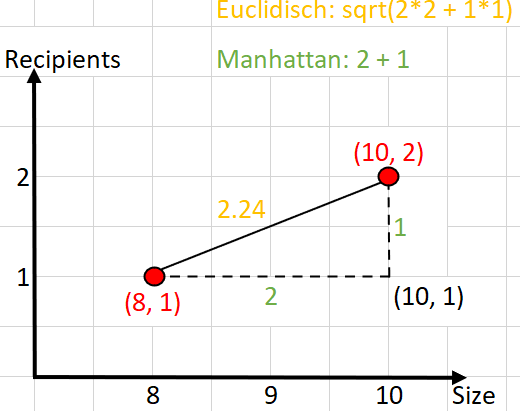

Meerdere mogelijkheden om Manhattan afstand te berekenen:

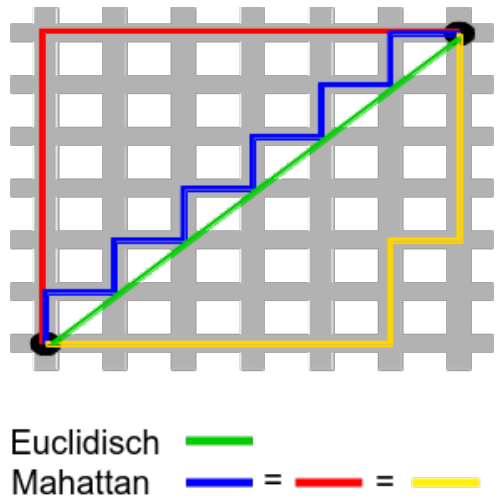

Begrijp je nu waarom het de Manhattan of taxi afstand noemt?

Check bijvoorbeeld https://www.mapsinternational.co.uk/new-york-city-street-map-print-charcoal.html

#### Voorbeelden

De Manhattan afstandsmatrix voor de 2D dataset "mails.csv":

In [ ]:
mails

,E-mail,Size,Recipients
0,1,8,1
1,2,12,1
2,3,43,1
3,4,10,2
4,5,40,2
5,6,25,5
6,7,23,6
7,8,28,6
8,9,26,7


In [ ]:
n = len(mails)
D = np.zeros((n, n))  # elementen op diagonaal zijn reeds 0 -> overslaan
X = mails[["Size", "Recipients"]].values
for i in range(n):
    for j in range(i+1, n):  # gebruik maken van symmetrie!
        D[i, j] = D[j, i] = np.sum(np.abs(X[i, :] - X[j, :]))  # gebruik maken van symmetrie!
D

array([[ 0.,  4., 35.,  3., 33., 21., 20., 25., 24.],
       [ 4.,  0., 31.,  3., 29., 17., 16., 21., 20.],
       [35., 31.,  0., 34.,  4., 22., 25., 20., 23.],
       [ 3.,  3., 34.,  0., 30., 18., 17., 22., 21.],
       [33., 29.,  4., 30.,  0., 18., 21., 16., 19.],
       [21., 17., 22., 18., 18.,  0.,  3.,  4.,  3.],
       [20., 16., 25., 17., 21.,  3.,  0.,  5.,  4.],
       [25., 21., 20., 22., 16.,  4.,  5.,  0.,  3.],
       [24., 20., 23., 21., 19.,  3.,  4.,  3.,  0.]])

De Manhattan afstandsmatrix voor de 3D dataset met examenscores:

In [ ]:
examens

,Python,MachineLearning,DeepLearning
Jan,14,12,11
An,18,15,17
Piet,17,11,14
Miet,15,14,17
Jef,13,16,12


In [ ]:
n = examens.shape[0]
D = np.zeros((n, n))
X = examens.values
for i in range(n):
    for j in range(i+1, n):  # gebruik maken van symmetrie!
        D[i, j] = D[j, i] = np.sum(np.abs(X[i, :] - X[j, :]))  # gebruik maken van symmetrie!
D

array([[ 0., 13.,  7.,  9.,  6.],
       [13.,  0.,  8.,  4., 11.],
       [ 7.,  8.,  0.,  8., 11.],
       [ 9.,  4.,  8.,  0.,  9.],
       [ 6., 11., 11.,  9.,  0.]])

De Manhattan afstandsmatrix voor de 5D dataset met de tekstdocumenten:

In [ ]:
doc

,tekst,paard,muis,hond,koe,kat
0,hond hond kat,0,0,2,0,1
1,kat muis hond,0,1,1,0,1
2,kat kat muis paard,1,1,0,0,2
3,koe paard muis muis,1,2,0,1,0
4,hond kat koe,0,0,1,1,1
5,muis koe koe,0,1,0,2,0


In [ ]:
n = doc.shape[0]
D = np.zeros((n, n))
X = doc[woorden].values
for i in range(n):
    for j in range(i+1, n):  # gebruik maken van symmetrie!
        D[i, j] = D[j, i] = np.sum(np.abs(X[i, :] - X[j, :]))  # gebruik maken van symmetrie!
D

array([[0., 2., 5., 7., 2., 6.],
       [2., 0., 3., 5., 2., 4.],
       [5., 3., 0., 4., 5., 5.],
       [7., 5., 4., 0., 5., 3.],
       [2., 2., 5., 5., 0., 4.],
       [6., 4., 5., 3., 4., 0.]])

## 3. Clustering algoritmen

We bespreken 2 van de bekendste soorten clustering algoritmen:
- **vlakke clustering**
- **hiërachische clustering**

en implementeren van elke soort een algoritme als voorbeeld.

Maar eerst leggen we uit wat clustering is.

### 3.1. Wat zijn clusters?

#### Cluster

- = groep of verzameling van datapunten die obv hun features zijn samengenomen
- vergelijk met GROUP BY in SQL, alleen nemen we nu alle attributen
- gebruik maken van afstandsmaten om de clusters te bepalen

Voorbeeld: iris dataset
- 3 features:
  - bloembladbreedte (petal width)
  - bloembladlengte (petal length)
  - kelkbladbreedte (sepal width)
- Figuur: datapunten in clusters opgedeeld
  - links: 3 clusters
  - rechts: 8 clusters
  - Welke geeft het beste resultaat?
- In werkelijkheid: 3 soorten irissen
  - Virginica
  - Versicolour
  - Setosa
- Conclusie: 3 clusters is ook duidelijk beter dan 8!


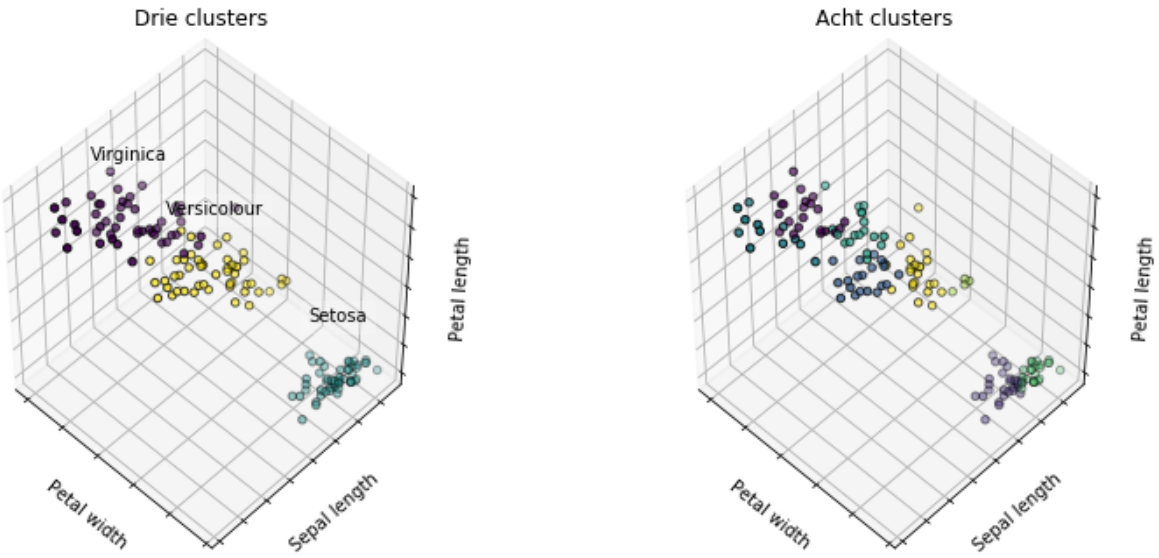

Goede clustering als:
- clusters ver van elkaar liggen
- punten in dezelfde cluster dicht bij elkaar liggen

Of wiskundig:
- afstand tussen clusters onderling is groot
- afstand tussen datapunten in dezelfde cluster is klein

#### Intercluster afstand

- = afstand tussen twee clusters
- kan op verschillende manieren gedefinieerd worden


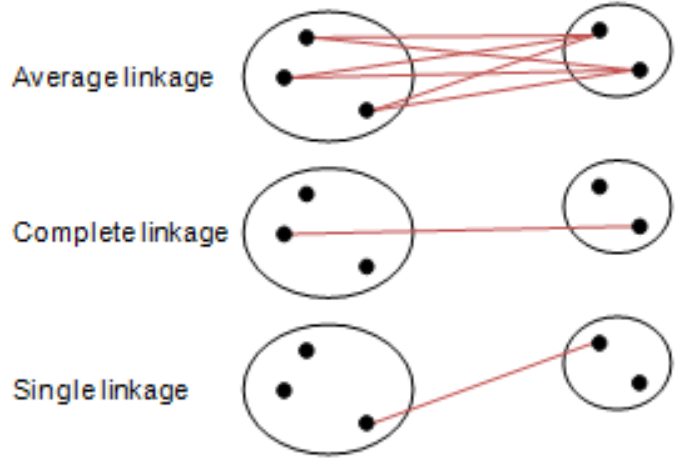

De intercluster afstand tussen twee clusters C1 en C2 kan als volgt berekend worden:
- **average linkage**: het gemiddelde van alle afstanden tussen alle elementen onderling
- **complete linkage**: de afstand tussen de twee verst verwijderde punten
- **single linkage**: de afstand tussen de twee dichtst gelegen punten

Voorbeeld:
- dataset mails.csv
- 1 feature: Recipients
- 2 clusters:
  - eerste cluster: 1 of 2 Recipients
  - tweede cluster: 5, 6 of 7 Recipients

Bereken de verschillende intercluster afstanden:

In [ ]:
# clusters
C1 = mails[mails["Recipients"] <= 2]
C2 = mails[mails["Recipients"] >= 5]

In [ ]:
C1

,E-mail,Size,Recipients
0,1,8,1
1,2,12,1
2,3,43,1
3,4,10,2
4,5,40,2


In [ ]:
C2

,E-mail,Size,Recipients
5,6,25,5
6,7,23,6
7,8,28,6
8,9,26,7


In [ ]:
# afstandsmatrix
n = len(mails)
D = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        # opgelet! de mail ids starten bij 1 ipv 0!
        D[i, j] = np.sqrt((mails.loc[mails["E-mail"] == i+1, "Recipients"].values -
                           mails.loc[mails["E-mail"] == j+1, "Recipients"].values) ** 2).item()
D

array([[0., 0., 0., 1., 1., 4., 5., 5., 6.],
       [0., 0., 0., 1., 1., 4., 5., 5., 6.],
       [0., 0., 0., 1., 1., 4., 5., 5., 6.],
       [1., 1., 1., 0., 0., 3., 4., 4., 5.],
       [1., 1., 1., 0., 0., 3., 4., 4., 5.],
       [4., 4., 4., 3., 3., 0., 1., 1., 2.],
       [5., 5., 5., 4., 4., 1., 0., 0., 1.],
       [5., 5., 5., 4., 4., 1., 0., 0., 1.],
       [6., 6., 6., 5., 5., 2., 1., 1., 0.]])

In [ ]:
# single linkage
d_single = np.Inf
for p1 in C1['E-mail'].values:
    for p2 in C2['E-mail'].values:
        d_single = min(D[p1-1, p2-1], d_single)
d_single

3.0

In [ ]:
# complete linkage
d_complete = 0
for p1 in C1['E-mail'].values:
    for p2 in C2['E-mail'].values:
        d_complete = max(D[p1-1, p2-1], d_complete)
d_complete

6.0

In [ ]:
# average linkage
d_average = 0
n = 0
for p1 in C1['E-mail'].values:
    for p2 in C2['E-mail'].values:
        n += 1
        d_average += D[p1-1, p2-1]
d_average /= n
d_average

4.6

Gevectoriseerd:

In [ ]:
i1 = np.isin(mails['E-mail'].values, C1['E-mail'].values)  # boolean die C1 datapunten aangeeft
i2 = np.isin(mails['E-mail'].values, C2['E-mail'].values)  # boolean die C2 datapunten aangeeft
D_C1_C2 = D[:, i1][i2, :]  # deel van de afstandsmatrix met enkel de afstanden tussen C1 en C2 datapunten
D_C1_C2

array([[4., 4., 4., 3., 3.],
       [5., 5., 5., 4., 4.],
       [5., 5., 5., 4., 4.],
       [6., 6., 6., 5., 5.]])

In [ ]:
print("single:", np.min(D_C1_C2))
print("complete:", np.max(D_C1_C2))
print("average:", np.mean(D_C1_C2))

single: 3.0
complete: 6.0
average: 4.6


### 3.2. Vlakke clustering

#### K-Means

- één van de bekendste clustering algoritmen
- dataset in K groepen of clusters opdelen
- aantal clusters K moet opgegeven worden
- er bestaan technieken om optimale K te bepalen (maar dit is out of scope)

##### **Pseudocode**

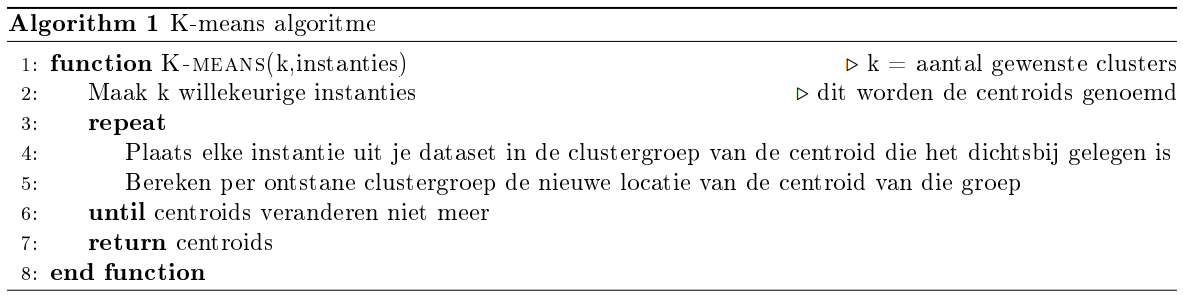

Uitleg:
1. input: aantal clusters k + de dataset (instanties)
2. maak k nieuwe willekeurige instanties = **centroids**
3. itereren over stappen 4 en 5
4. elke instantie uit de dataset wordt toegekend aan de dichtsbijzijnde centroid --> je krijgt k clusters
5. centroids verplaatsen naar het midden van hun cluster
6. stappen 4 en 5 herhalen tot de centroids niet meer bewegen
7. output: de centroids


Let op!
- niet verwarren met k-nearest neighbors (KNN) = supervised learning!
- er zijn betere algoritmes, vandaar dat deze versie ook wel "naive k-means" wordt genoemd
- het algoritme convergeert niet altijd naar een optimale oplossing
- het algoritme vindt **altijd exact k clusters**, ongeacht of er in werkelijkheid meer of minder groepen zijn!
- voor het initialiseren van de centroids (stap 2) zijn er verschillende methodes, bijvoorbeeld:
  - k willekeurige datapunten uit de dataset nemen (= Forgy's method)
  - datapunten willekeurig aan een cluster toekennen (= Random Partition)
- de centroids hebben evenveel dimensies als de datapunten in de dataset.
  - vb: dataset met 2 features -> datapunten hebben 2 getallen als coördinaat -> centroids initialiseren met 2 willekeurige getallen als coördinaat (stap 2)
  - vb: dataset met 10 features -> datapunten hebben 10 getallen als coördinaat -> centroids initialiseren met 10 willekeurige getallen als coördinaat (stap 2)

DEMO: https://youtu.be/nXY6PxAaOk0

##### **Implementatie**

*Centroids initialiseren*
- willekeurig k datapunten selecteren
- k = aantal clusters
- dataset shuffelen en dan k punten selecteren zonder terugleggen
- module `numpy.random`: functies `shuffle` en `choice`

In [ ]:
# k = 3 clusters in dataset mails.csv
k = 3

# ids van datapunten
ids = np.arange(len(mails))
print(ids)

# ids shuffelen
np.random.shuffle(ids)
print(ids)

# k willekeurige ids selecteren zonder terugleggen (replace=False)
ic = np.random.choice(ids, size=k, replace=False)
print(ic)

[0 1 2 3 4 5 6 7 8]
[8 0 2 6 1 3 7 4 5]
[4 0 3]


In [ ]:
# centroids
mails.iloc[ic, :]

,E-mail,Size,Recipients
4,5,40,2
0,1,8,1
3,4,10,2


*Afstand berekenen tussen centroids en datapunten*
- coördinaten van centroids en datapunten in matrices plaatsen:
  - `n` features
  - `m` datapunten
  - `k` centriods
  - `C`: `k` x `n` matrix met coördinaten centroids
  - `X`: `m` x `n` matrix met coördinaten datapunten
- centroids overlopen met `for`-loop
  - Euclidische afstand tussen centroid en datapunten berekenen
  - expressies vectoriseren
  - broadcasting toepassen: `X - c[i, :]` is mogelijk!
- resultaat: `m` x `k` matrix `D` met de afstanden van elk datapunt tot de `k` centroids

In [ ]:
# matrices C en X
features = ['Size', 'Recipients']
C = mails.iloc[ic, np.isin(mails.columns, features)].values.astype(float)  # omzetten naar float!
C

array([[40.,  2.],
       [ 8.,  1.],
       [10.,  2.]])

In [ ]:
X = mails[features].values.astype(float)  # omzetten naar float!!
X

array([[ 8.,  1.],
       [12.,  1.],
       [43.,  1.],
       [10.,  2.],
       [40.,  2.],
       [25.,  5.],
       [23.,  6.],
       [28.,  6.],
       [26.,  7.]])

In [ ]:
# functie om euclidische afstand te berekenen
# X is matrix met coördinaten van datapunten
# c is vector met coördinaat van 1 centroid
distance = lambda X, c: np.sqrt(np.sum(np.square(X - c), axis=1))

In [ ]:
# afstanden berekenen en opslaan in matrix D
m, n = X.shape
D = np.zeros((m, k))  # initialiseren
for i in range(k):
    D[:, i] = distance(X, C[i, :])
D

array([[32.01562119,  0.        ,  2.23606798],
       [28.01785145,  4.        ,  2.23606798],
       [ 3.16227766, 35.        , 33.01514804],
       [30.        ,  2.23606798,  0.        ],
       [ 0.        , 32.01562119, 30.        ],
       [15.29705854, 17.4642492 , 15.29705854],
       [17.4642492 , 15.8113883 , 13.60147051],
       [12.64911064, 20.61552813, 18.43908891],
       [14.86606875, 18.97366596, 16.76305461]])

*Datapunten toekennen aan een cluster*
- elke centroid vertegenwoordigt een cluster
- datapunt behoort tot cluster met dichtst liggende centroid
- minimale afstand selecteren uit matrix `D`
- kolom index nodig: functie `argmin` gebruiken

In [ ]:
np.argmin([20, 10, 40, 30, 0, 50])  # geeft index van kleinste element

4

In [ ]:
# vector met cluster index voor elke datapunt
cluster = np.argmin(D, axis=1)
cluster

array([1, 2, 0, 2, 0, 0, 2, 0, 0])

*Positie van centroids herberekenen*
- centroid verplaatsen naar het midden van zijn cluster
- gemiddelde nemen van coördinaten van datapunten in de cluster
- vectoriseren: functie `mean` gebruiken

Voorbeeld:
- 2 datapunten (8, 1) en (10, 2)
- 1 centroid die in het midden van die datapunten moet geplaatst worden
- positie centroid = ((8 + 10)/2, (1 + 2)/2) = (9, 1.5)

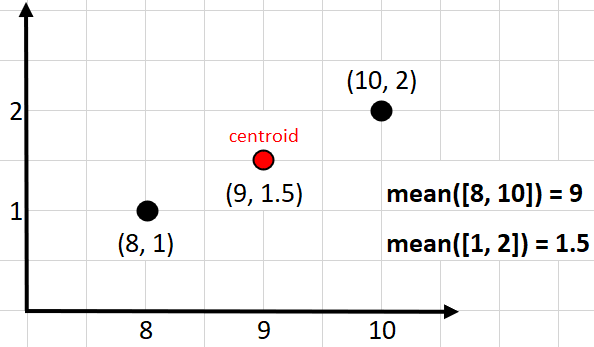

In [ ]:
# centroids overlopen en nieuwe positie berekenen
for i in range(k):
    C[i, :] = np.mean(X[cluster==i, :], axis=0)
C

array([[32.4,  4.2],
       [ 8. ,  1. ],
       [15. ,  3. ]])

*Stappen samenvoegen in functie `kmeans`*

In [ ]:
def kmeans(X, k, niter=100):
# X is m x n array met m datapunten (rijen) en n features (kolommen)
# k is het aantal clusters (geheel getal > 0)
# retourneert een array met de m cluster indices van de datapunten
#  en een k x n array met de coördinaten van de overeenkomstige centroids

    # dataset: aantal datapunten en features
    m, n = X.shape

    # centroids initialiseren
    ids = np.arange(m)
    np.random.shuffle(ids)
    ic = np.random.choice(ids, size=k, replace=False)
    C = X[ic, :]

    # iteraties
    for _ in range(niter):

        # afstanden berekenen en opslaan in matrix D
        D = np.zeros((m, k))  # initialiseren
        for i in range(k):
            D[:, i] = distance(X, C[i, :])

        # nieuwe clusters
        cluster = np.argmin(D, axis=1)

        # nieuwe positie centroids
        for i in range(k):
            C[i, :] = np.mean(X[cluster==i, :], axis=0)

    # output
    return cluster, C

*Uittesten op dataset en plot maken*

In [ ]:
clusters, centroids = kmeans(X, k)

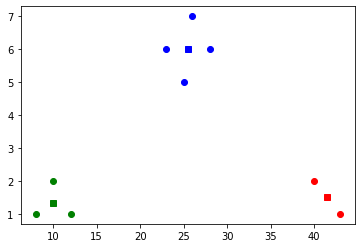

In [ ]:
import matplotlib.pyplot as plt

colors = ['r', 'g', 'b']
for i in range(k):
    plt.plot(X[clusters==i, 0], X[clusters==i, 1], colors[i] + 'o')  # datapunten = cirkels
    plt.plot(centroids[i, 0], centroids[i, 1], colors[i] + "s")  # centroid = vierkantje

*Cluster bepalen van nieuwe datapunten*

In [ ]:
def predict(X, C):
# X is array met nieuwe datapunten
# C is array met centroids

    # aantal datapunten en centroids
    m = X.shape[0]
    k = C.shape[0]

    # afstanden berekenen en opslaan in matrix D
    D = np.zeros((m, k))  # initialiseren
    for i in range(k):
        D[:, i] = distance(X, C[i, :])

    # nieuwe clusters
    return np.argmin(D, axis=1)

Testen op twee nieuwe mails:
- grootte 15 Kb en 2 ontvangers
- grootte 20 Kb en 5 ontvangers

In [ ]:
Xnew = np.array([[15, 2], [20, 5]])
icluster = predict(Xnew, centroids)
icluster

array([1, 2])

In [ ]:
for i, x in enumerate(Xnew):
    print(x, ":", colors[icluster[i]])

[15  2] : g
[20  5] : b


*Errorfunctie*

Net als bij de andere Machine Learning algoritmes die we hebben besproken, komt het K-means algoritme wiskundig gezien ook neer op het minimaliseren van een errorfunctie of doelfunctie. In feite spreken we hier van **Expectation-Maximization**:
- Expectation: datapunten toekennen aan dichtsbijzijnde centroid
- Maximization: nieuwe positie van centroids berekenen

De doelfunctie is in het geval van K-means de totale intra-cluster variantie of de sum of squared errors (SSE). Dit is eenvoudig gezegd de som van de kwadraten van alle afstanden van de datapunten tot de centroid van de cluster waartoe ze behoren.

In [ ]:
def kmeans_error(X, C, clusters):
# X is array met nieuwe datapunten
# C is array met centroids
# clusters is array met cluster indices van de datapunten

    # afstanden berekenen en opslaan in matrix D
    SSE = 0
    for i in range(C.shape[0]):
        SSE += np.sum(np.square(distance(X[clusters==i, :], C[i, :])))

    # output
    return SSE

In [ ]:
# toepassen op voorbeeld
kmeans_error(X, centroids, clusters)

28.666666666666664

##### Scikit-Learn

Scikit-Learn heeft uiteraard ook een klasse die K-Means implementeert:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=3, max_iter=100)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Uit de documentatie halen we de volgende attributen met de resultaten:

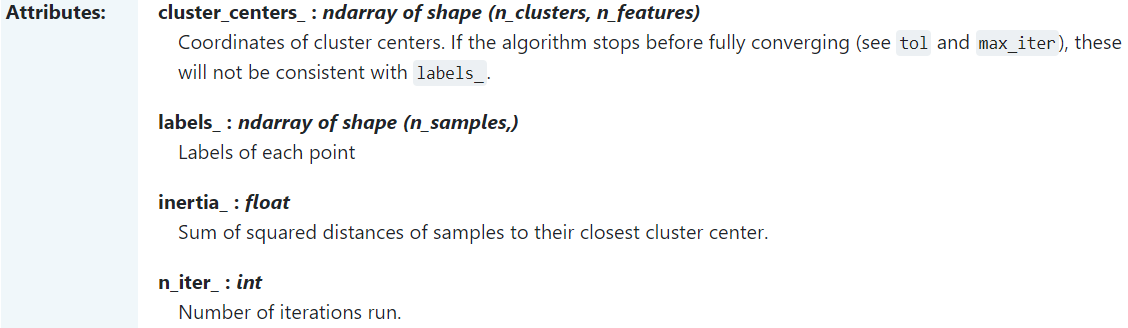

- `labels_`: geeft aan tot welke cluster elk datapunt hoort
- `cluster_centers_`: de coördinaten van de centroids
- `inertia_`: de SSE
- `n_iter_`: het aantal iteraties dat het algoritme heeft doorlopen


In [ ]:
km.labels_

array([0, 0, 2, 0, 2, 1, 1, 1, 1], dtype=int32)

In [ ]:
km.cluster_centers_

array([[10.        ,  1.33333333],
       [25.5       ,  6.        ],
       [41.5       ,  1.5       ]])

In [ ]:
km.inertia_

28.666666666666664

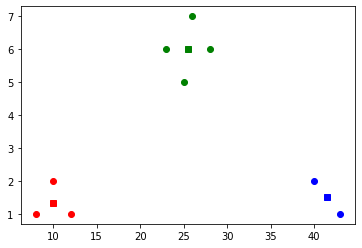

In [ ]:
# plot
colors = ['r', 'g', 'b']
for i in range(km.n_clusters):
    plt.plot(X[km.labels_==i, 0], X[km.labels_==i, 1], colors[i] + 'o')  # datapunten = cirkels
    plt.plot(km.cluster_centers_[i, 0], km.cluster_centers_[i, 1], colors[i] + "s")  # centroid = vierkantje

En we kunnen natuurlijk ook voorspellingen maken voor nieuwe datapunten:

In [ ]:
Xnew = np.array([[15, 2], [20, 5]])
icluster = km.predict(Xnew)
icluster

array([0, 1], dtype=int32)

In [ ]:
for i, x in enumerate(Xnew):
    print(x, ":", colors[icluster[i]])

[15  2] : r
[20  5] : g


#### Andere algoritmes

Er zijn uiteraard nog vele andere (vlakke) clustering algoritmes, zoals DBSCAN.

Een leuk overzicht vind je hier: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html.

Deze algoritmes vallen buiten de scope van deze cursus.

### 3.3. Hiërarchische clustering

Hiërarchisch clustering algoritmes:
- hoeven het aantal clusters niet op voorhand te weten
- sterker nog: vinden alle mogelijke clusters!
- de gevonden clusters hangen wel af van de gebruikte inter-clusterafstand (single, complete, average, ...)
- twee strategieën:
  - bottom-up of **agglomeratief**: beginnen met kleine clusters en clusters groter laten worden
  - top-down of **divisief**: starten met één grote cluster en opsplitsen in steeds kleinere clusters

Let op!
- niet verwarren met beslissingsbomen uit supervised learning!
- wel te gebruiken om dataset te labelen en daarna beslissingsbomen op toe te passen...

#### Agglomeratief Clustering Algoritme

*Eenvoudig voorbeeldje*

Dataset:

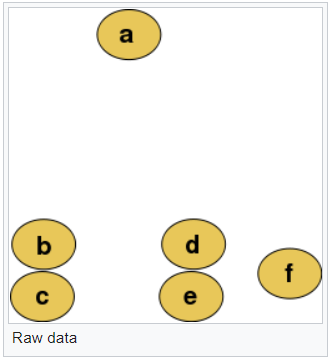

Resultaat van agglomeratieve clustering met Euclidische afstand als afstandsmaat: **Dendrogram**

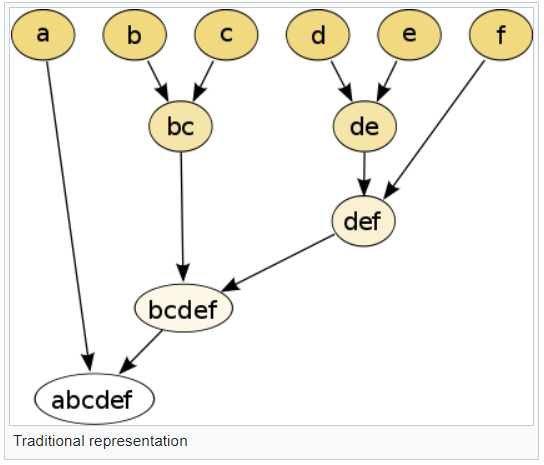

*Scikit-Learn*

Klasse `AgglomerativeClustering`:

In [ ]:
from sklearn.cluster import AgglomerativeClustering as ACA

Volledige boom opstellen:

In [ ]:
aca = ACA(
    affinity="euclidean",    # afstandsmaat
    linkage='complete',      # intercluster afstand
    n_clusters=None,         # op None zetten om aantal clusters niet te beperken
    compute_full_tree=True,  # volledige boom opstellen
    distance_threshold=0,    # op 0 zetten om volledige boom op te stellen
)
aca

AgglomerativeClustering(affinity='euclidean', compute_full_tree=True,
                        connectivity=None, distance_threshold=0,
                        linkage='complete', memory=None, n_clusters=None)

Toepassen op dataset "mails.csv":

In [ ]:
X = mails[features].values.astype(float)
aca.fit(X)  # unsupervised learning, dus enkel X!!

AgglomerativeClustering(affinity='euclidean', compute_full_tree=True,
                        connectivity=None, distance_threshold=0,
                        linkage='complete', memory=None, n_clusters=None)

Dendrogram plotten m.b.v. scipy's `dendrogram` functie:

Code kopiëren van https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


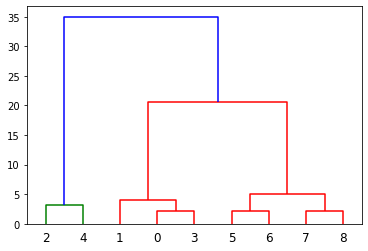

In [ ]:
plot_dendrogram(aca)

Hoe interpreteren?
- x-as: labels van de datapunten
- y-as: maat voor de afstand tussen de datapunten in de clusters
- ter hoogte van 35: 1 cluster met alle datapunten
- ter hoogte van 0: elk datapunt is een cluster
- ter hoogte van 10: 3 K-means clusters

3 K-means clusters aanduiden op plot: `color_threshold` op 10 zetten

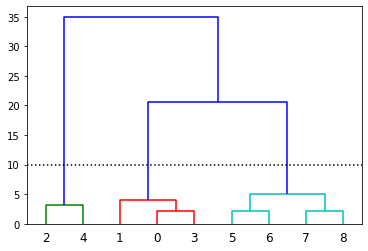

In [ ]:
plot_dendrogram(aca, color_threshold=10)
# rechte y=10 plotten
plt.plot(plt.gca().get_xlim(), [10, 10], 'k:');

- color treshold -> 3 K-Means clusters in aparte kleur
- rechte y=10 snijdt dendrogram 3 keer -> 3 clusters
- dendrogram naar beneden volgen vanaf rechte -> 3 K-Means clusters

Boom beperken tot 3 clusters:

In [ ]:
aca = ACA(
    affinity="euclidean",    # afstandsmaat
    linkage='complete',      # intercluster afstand
    n_clusters=3,            # aantal clusters beperken tot 3
    compute_full_tree=False, # geen volledige boom opstellen
    distance_threshold=None  # None want n_clusters is gegeven
)

In [ ]:
aca.fit(X)
aca.labels_

array([2, 2, 1, 2, 1, 0, 0, 0, 0])

Labels toevoegen aan dataframe, zelfde clusters als K-means!

In [ ]:
mails["labels"] = aca.labels_
mails

,E-mail,Size,Recipients,labels
0,1,8,1,2
1,2,12,1,2
2,3,43,1,1
3,4,10,2,2
4,5,40,2,1
5,6,25,5,0
6,7,23,6,0
7,8,28,6,0
8,9,26,7,0


#### Andere algoritmes

Er zijn uiteraard nog andere hiërarchische clustering algoritmes, maar deze vallen buiten het bestek van deze cursus.



---



---
## Bronnen:
*  Hoofdstuk "Clustering", cursus Data Science II, opleiding professionele bachelor Toegepaste Informatica, Karel de Grote Hogeschool, opgesteld door W. De Ketelaere, 2018.
*  https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
*  https://en.wikipedia.org/wiki/K-means_clustering
*  https://en.wikipedia.org/wiki/Hierarchical_clustering
*  https://scikit-learn.org/stable/modules/clustering.html
*  Handboek: Grokking Machine Learning (version 12), Manning Early Access Program, by Luis G. Serrano, 2020.
